# Estatística descritiva univariada

## Tabela de distribuição de frequências e representações gráficas

As tabelas de distribuições de frequência podem ser utilizadas para representar a frequência de ocorrências de um conjunto de observações de variáveis qualitativas ou quantitativas.

No caso de variáveis qualitativas, a tabela representa a frequência de ocorrências de cada categoria da variável. Para as variáveis quantitativas discretas, a frequência de ocorrências é calculada para cada valor discreto da variável. Já os dados das variáveis contínuas são agrupados inicialmente em classes, e a partir daí são calculadas as
frequências de ocorrências para cada classe.

Uma tabela de distribuição de frequências usualmente comporta os seguintes cálculos:

- Frequência absoluta (*F<sub>i</sub>*): número de ocorrências de cada elemento *i* na amostra.
- Frequência relativa (*Fr<sub>i</sub>*): porcentagem relativa à frequência absoluta.
- Frequência acumulada (*F<sub>ac</sub>*): soma de todas as ocorrências até o elemento analisado.
- Frequência relativa acumulada (*Fr<sub>ac</sub>*}: porcentagem relativa à frequência acumulada (soma de todas as frequências relativas até o elemento analisado).

#### Exemplo 2 - Pareto

O diagrama de Pareto é uma das ferramentas da Qualidade e visa investigar os tipos de problemas e, consequentemente, identificar suas respectivas causas, de forma que uma ação possa ser tomada a fim de reduzi-las ou eliminá-las.

O diagrama de Pareto é um gráfico de barras vertical combinado com um gráfico de linhas. As barras representam as frequências absolutas de ocorrências dos problemas e as linhas representam as frequências relativas acumuladas. Os problemas são usualmente ordenados em forma decrescente de prioridade.

Para ilustrar, usaremos uma base de dados de uma empresa fabricante de cartões de crédito. A empresa pretende reduzir o número de cartões defeituosos. O inspetor de qualidade classificou a amostra de 1.000 cartões coletada durante uma semana de produção, segundo os tipos de defeitos detectados.

In [8]:
import pandas as pd

DADOS = "../base_de_dados/cartoes.csv"

df_cartoes = pd.read_csv(DADOS)

df_cartoes

,tipo_de_defeito,frequencia
0,amassado,71
1,perfurado,28
2,impressao_ilegivel,12
3,caracteres_errados,20
4,numeros_errados,44
5,outros,6


Ordenando coluna de frequencia considerando todo o dataframe 

In [9]:
df_cartoes = df_cartoes.sort_values(by="frequencia",ascending=False)

df_cartoes

,tipo_de_defeito,frequencia
0,amassado,71
4,numeros_errados,44
1,perfurado,28
3,caracteres_errados,20
2,impressao_ilegivel,12
5,outros,6


- criando coluna de frequencia relativa, frequencia acumulada e frequencia relativa acumulada a partir da coluna de frequência

In [10]:
df_cartoes['frequencia_relativa'] = df_cartoes["frequencia"] / df_cartoes['frequencia'].sum()
df_cartoes['frequencia_acumulada'] = df_cartoes['frequencia'].cumsum()
df_cartoes['frequencia_relativa_acumulada'] = df_cartoes['frequencia_relativa'].cumsum()

df_cartoes

,tipo_de_defeito,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
0,amassado,71,0.392265,71,0.392265
4,numeros_errados,44,0.243094,115,0.635359
1,perfurado,28,0.154696,143,0.790055
3,caracteres_errados,20,0.110497,163,0.900552
2,impressao_ilegivel,12,0.066298,175,0.966851
5,outros,6,0.033149,181,1.000000


- Recriando dataframe 
  

In [11]:

df_cartoes = pd.read_csv(DADOS)

df_cartoes = df_cartoes.sort_values(by="frequencia",ascending=False)

df_cartoes

,tipo_de_defeito,frequencia
0,amassado,71
4,numeros_errados,44
1,perfurado,28
3,caracteres_errados,20
2,impressao_ilegivel,12
5,outros,6


In [12]:
from funcoes_auxiliares import tabela_distribuicao_frequencias

df_pareto = tabela_distribuicao_frequencias(df_cartoes, "frequencia", coluna_frequencia=True)

df_pareto

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
0,71,0.392265,71,0.392265
4,44,0.243094,115,0.635359
1,28,0.154696,143,0.790055
3,20,0.110497,163,0.900552
2,12,0.066298,175,0.966851
5,6,0.033149,181,1.000000


- Definindo um novo índice para o DataFrame df_pareto usando a coluna "tipo_de_defeito" 

In [13]:
df_pareto = df_pareto.set_index(df_cartoes["tipo_de_defeito"])
df_pareto

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
tipo_de_defeito,,,,
amassado,71,0.392265,71,0.392265
numeros_errados,44,0.243094,115,0.635359
perfurado,28,0.154696,143,0.790055
caracteres_errados,20,0.110497,163,0.900552
impressao_ilegivel,12,0.066298,175,0.966851
outros,6,0.033149,181,1.000000


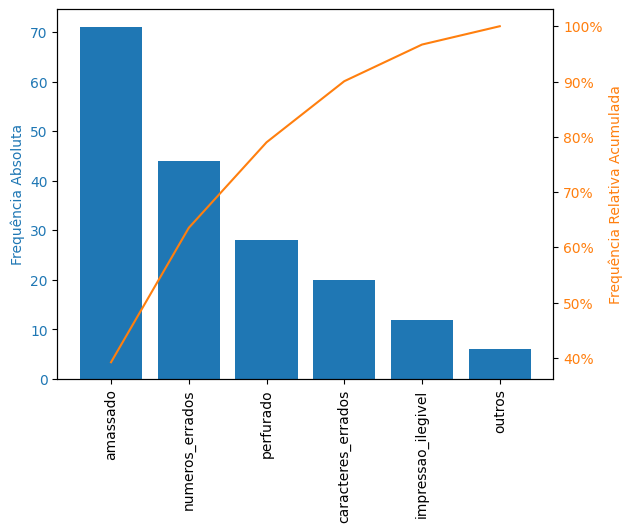

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_pareto.index, df_pareto["frequencia"], color="C0")
ax2.plot(df_pareto.index, df_pareto["frequencia_relativa_acumulada"], color="C1")

ax.set_ylabel("Frequência Absoluta", color="C0")
ax.tick_params(axis="y", labelcolor="C0")
ax.tick_params(axis="x", rotation=90)

ax2.set_ylabel("Frequência Relativa Acumulada", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()